In [0]:
import numpy as np
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def unpickle(file):
 '''Load byte data from file'''
 with open(file, 'rb') as f:
  data = pickle.load(f, encoding='latin-1')
  return data

In [4]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 54s 0us/step


In [5]:
print('X_train shape:', X_train.shape)
print('y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', Y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [0]:
X_train_unshuf_unscaled = X_train

In [7]:
X_train_unshuf_reshaped_unscaled=X_train_unshuf_unscaled.reshape(50000,32*3*32)
X_train_unshuf_reshaped_unscaled

array([[ 59,  62,  63, ..., 123,  92,  72],
       [154, 177, 187, ..., 143, 133, 144],
       [255, 255, 255, ...,  80,  86,  84],
       ...,
       [ 35, 178, 235, ...,  12,  31,  50],
       [189, 211, 240, ..., 195, 190, 171],
       [229, 229, 239, ..., 163, 163, 161]], dtype=uint8)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val  = train_test_split(X_train_unshuf_reshaped_unscaled, Y_train, test_size = 1/10, random_state = 42)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))

In [0]:
X_val_s = scaler.fit_transform(X_val.astype(np.float32))
y_train = y_train.astype(np.int32)

In [0]:
import tensorflow as tf

In [0]:
from sklearn.metrics import accuracy_score

In [13]:
#learning curve

Train_size_list_10epfix = [50000]
Train_error_list_10epfix = []
Val_error_list_10epfix = []
Train_time_list_10epfix = []
Val_time_list_10epfix = []

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_s)
    
dnn_1_clf = tf.contrib.learn.DNNClassifier(activation_fn=tf.nn.relu, hidden_units=[7000,6000], n_classes=10, feature_columns=feature_columns, config=config)
dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    

from datetime import datetime
start=datetime.now()
dnn_1_clf.fit(X_train_s, y_train, batch_size=200, steps=(5*1100))
Train_elapse = (datetime.now()-start).total_seconds()
print('dnn_1_clf training time', Train_elapse)
    
y_train_pred = dnn_1_clf.predict(X_train_s) #return dictionary
Train_error = 1 - accuracy_score(y_train, y_train_pred['classes'])

    
print(type(y_train_pred))

start=datetime.now()
y_val_pred =  dnn_1_clf.predict(X_val_s)
    
Val_elapse = (datetime.now()-start).total_seconds()

Val_time_list_10epfix.append(Val_elapse)
Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
Train_error_list_10epfix.append(Train_error)
Val_error_list_10epfix.append(Val_error)
    
print("Train_size: ", Train_size_list_10epfix)
print("Train_error: ", Train_error_list_10epfix)
print("Val_error: ", Val_error_list_10epfix)
print("Train_time: ", Train_elapse)
print("Val_time: ", Val_elapse)  

valaccuracy = accuracy_score(y_val, y_val_pred['classes'])
trainaccuracy = accuracy_score(y_train, y_train_pred['classes'])
print('Validation error', Val_error)
print('Train error', Train_error)
print('Val Accuracy', valaccuracy)
print('Train Accuracy', trainaccuracy)

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f46ac89d8d0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_mas



```
BEST NEURON SIZE = [7000,6000]
ACTIVATION FUNCTION = RELU
VAL ERROR = 0.4134
VAL ACCURACY = 0.5866
TRAIN ACCURACY = 1
```



**FIXING THE VALUES AND FITTING IT TO THE MODEL**

In [14]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_s)
dnn_clf_opt = tf.contrib.learn.DNNClassifier(hidden_units=[7000,6000], n_classes=10,
                                         feature_columns=feature_columns, config=config)
dnn_clf_opt = tf.contrib.learn.SKCompat(dnn_clf_opt) # if TensorFlow >= 1.1
dnn_clf_opt.fit(X_train_s, y_train, batch_size=200, steps=10*1100)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f46b1cc4828>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpdjjbzlde'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpdjjbzlde/model.ckpt.
INFO:tensorflow:loss = 2.50359

SKCompat()

**THE FINAL TEST ACCURACY**

In [15]:
X_test_reshaped = X_test.reshape(10000,3072)
X_test_s = scaler.fit_transform(X_test_reshaped.astype(np.float32))
y_test_pred = dnn_clf_opt.predict(X_test_s)
accuracy_score(Y_test, y_test_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpdjjbzlde/model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.5896

In [16]:
type(y_test_pred['classes'])

numpy.ndarray

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,y_test_pred['classes']))

             precision    recall  f1-score   support

          0       0.66      0.70      0.68      1000
          1       0.72      0.66      0.69      1000
          2       0.49      0.46      0.48      1000
          3       0.41      0.40      0.41      1000
          4       0.51      0.50      0.51      1000
          5       0.51      0.49      0.50      1000
          6       0.60      0.67      0.63      1000
          7       0.64      0.65      0.64      1000
          8       0.70      0.73      0.71      1000
          9       0.63      0.63      0.63      1000

avg / total       0.59      0.59      0.59     10000



**CONFUSION MATRIX**

In [18]:
conf_mx_DNN_1L = confusion_matrix(Y_test, y_test_pred['classes'])



row_sum = np.sum(conf_mx_DNN_1L, axis =1, keepdims = True)
norm_conf_mx_DNN_1L = conf_mx_DNN_1L / row_sum
norm_conf_mx_DNN_1L.shape

(10, 10)

[[0.    0.018 0.039 0.016 0.029 0.013 0.026 0.021 0.091 0.047]
 [0.034 0.    0.021 0.022 0.014 0.016 0.016 0.02  0.064 0.132]
 [0.082 0.014 0.    0.086 0.116 0.06  0.088 0.054 0.021 0.02 ]
 [0.03  0.01  0.078 0.    0.072 0.182 0.119 0.056 0.02  0.033]
 [0.043 0.006 0.114 0.067 0.    0.048 0.095 0.085 0.02  0.023]
 [0.016 0.005 0.075 0.189 0.072 0.    0.056 0.06  0.014 0.018]
 [0.007 0.015 0.062 0.086 0.063 0.053 0.    0.014 0.014 0.014]
 [0.028 0.003 0.047 0.058 0.066 0.081 0.019 0.    0.012 0.038]
 [0.084 0.05  0.016 0.022 0.022 0.012 0.01  0.011 0.    0.045]
 [0.035 0.131 0.02  0.029 0.016 0.019 0.021 0.041 0.054 0.   ]]


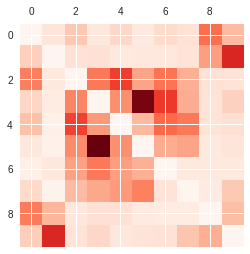

In [19]:
np.fill_diagonal(norm_conf_mx_DNN_1L, 0)
plt.matshow(norm_conf_mx_DNN_1L, cmap = plt.cm.Reds)

print(norm_conf_mx_DNN_1L)